In [297]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import warnings
import os

In [298]:
res_np_list = list()
print("algos studied are :")
for dirname, _, filenames in os.walk(r'C:\Users\nxa19765\Documents\data\kaggle\nlp twitter\results\data_frame\LR,RF,XGB and DNN averaged'):
    for filename in filenames:
        algo = filename[4:-4]
        print(algo)
        #res_np_list.append( ( pd.read_csv(os.path.join(dirname, filename)).transpose(),algo))
        res_np_list.append( ( pd.read_csv(os.path.join(dirname, filename)),algo))
print()

soft_pred_list      = list()
good_pred_list      = list()
# sum of all algos soft (0 to 1) prediction 
soft_pred_all       = np.array(res_np_list[0][0].target.to_numpy()) *  0
# sum of all algos optimum hard (0 or 1) prediction, or of all good predictions 
good_pred_all_opt   = np.int64(np.array(res_np_list[0][0].target.to_numpy()) *  0)
for res in res_np_list:
    algo              = res[1]
    soft_pred         = res[0].target.to_numpy()                     # current algo soft (0 to 1) prediction 
    soft_pred_list.append(soft_pred)                                 # log soft predictions for all algos, for later use
    hard_pred         = np.where(soft_pred>0.5, 1, 0)                # current algo hard (0 to 1) prediction
    good_pred         = 1-((np.bitwise_xor(perfect_pred,hard_pred))) # compute current algo good predictions (0:bad/1:good predictions)
    good_pred_list.append(good_pred)                                 # log good predictions for all algos, for later use
    pred_perf         = np.round(100*np.mean(good_pred),decimals=1)  # current algo prediction performance 
    print(algo, "performance of prediction =", pred_perf, "%")

    good_pred_all_opt = np.bitwise_or(good_pred,good_pred_all_opt)   # the optimum good prediction is the sum (i.e. or) of all individual algo good prediction
    
    soft_pred_all     = soft_pred_all + soft_pred                    # add soft predictions from all individual algo

soft_pred_all = soft_pred_all/4
hard_pred_all = np.where((soft_pred_all)>0.5, 1, 0)                  # sum of all algos hard (0 to 1) prediction   
good_pred_all = 1-((np.bitwise_xor(perfect_pred,hard_pred_all)))     # compute sum of all algos good predictions (0:bad/1:good predictions)
pred_perf_all = np.round(100*np.mean(good_pred_all),decimals=1)      # all algos prediction performance 
print("all algos added", "performances =", pred_perf_all, "%")      

pred_perf_all_opt = np.round(100*np.mean(good_pred_all_opt),decimals=1)         # all algos optimal prediction performance 
print("all algos added could optimally get to",pred_perf_all_opt,"%")



algos studied are :
dnn
log_reg
random_forest
xg_boost

dnn performance of prediction = 78.8 %
log_reg performance of prediction = 79.7 %
random_forest performance of prediction = 78.9 %
xg_boost performance of prediction = 77.2 %
all algos added performances = 80.2 %
all algos added could optimally get to 87.6 %


In [299]:
# find which elements were missed i.e. wrongly predicted by sum of algos while some algos did correctly predicted them
not_good_pred_all = 1-good_pred_all                                    # invert/not elements
missed_pred       = np.logical_and(good_pred_all_opt, not_good_pred_all)

# display the percent performance each algo could bring
N = len(good_pred_all)
for idx, good_pred in enumerate(good_pred_list):
    algo = res_np_list[idx][1]
    print(algo, "could bring",np.round(100*np.sum(good_pred[missed_pred]/N),decimals=1),"% performance improvement")


dnn could bring 1.5 % performance improvement
log_reg could bring 2.6 % performance improvement
random_forest could bring 3.1 % performance improvement
xg_boost could bring 4.1 % performance improvement


In [300]:
# this function plots the prediction distribution
def plot_pred_dist(dist,title_name,pc_or_cnt=True,x_min = 0,x_max = 1):

    if pc_or_cnt == 'cnt':
        curve = False
        y_lab = 'count'
    else:
        curve = True
        y_lab = 'Probability'
        if pc_or_cnt != 'pc':
            warnings.warn("Warning: wrong or undefined pc_or_cnt argument. Will plot density curve")

            
    fig, ax = plt.subplots(figsize=(15, 3))
    dist.plot.kde(ax=ax, legend=False, title=title_name)
    dist.plot.hist(density=curve, ax=ax,bins=100)
    ax.set_ylabel(y_lab)
    ax.set_xlabel('prediction')
    ax.grid(axis='y')
    ax.set_facecolor('#d8dcd6')

    
    
    plt.xlim(x_min, x_max)



C:\Users\nxa19765\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Warning: wrong or undefined pc_or_cnt argument. Will plot density curve
  # This is added back by InteractiveShellApp.init_path()


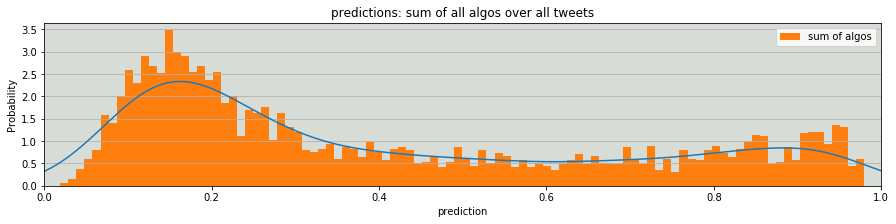

In [301]:
# plot predictions distributions
dist = pd.DataFrame(soft_pred_all,columns=['sum of algos'])

plot_pred_dist(dist,'predictions: sum of all algos over all tweets')


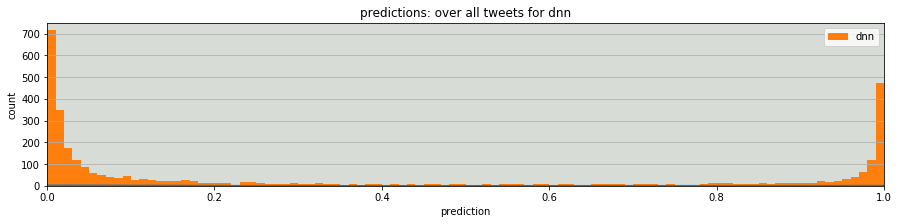

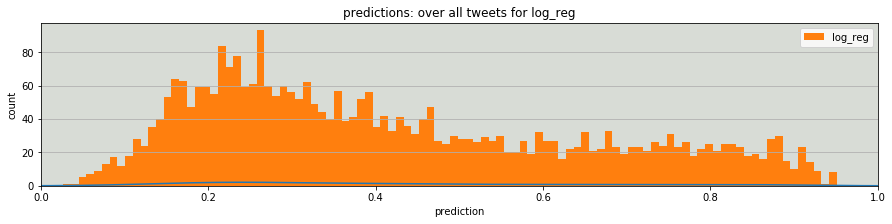

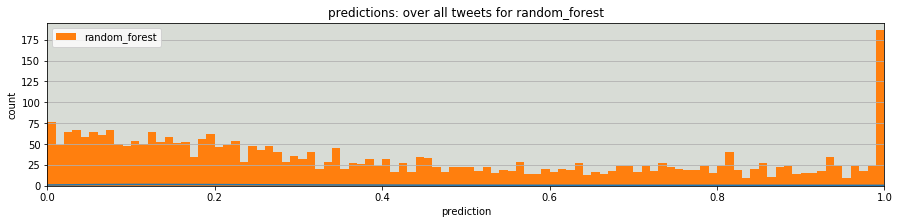

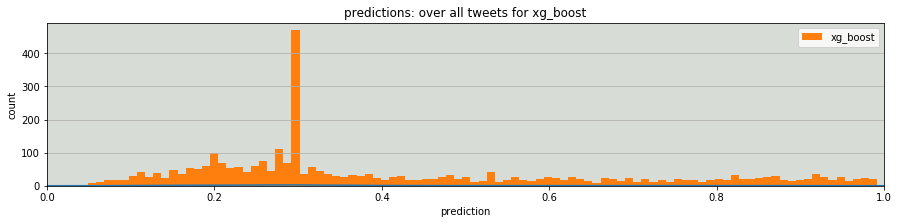

In [302]:
for res in res_np_list:
    algo              = res[1]
    soft_pred         = res[0].target.to_numpy()                     # current algo soft (0 to 1) prediction 

    dist              = pd.DataFrame(soft_pred,columns=[algo])

    plot_pred_dist(dist,'predictions: over all tweets for ' + algo, 'cnt' )
    

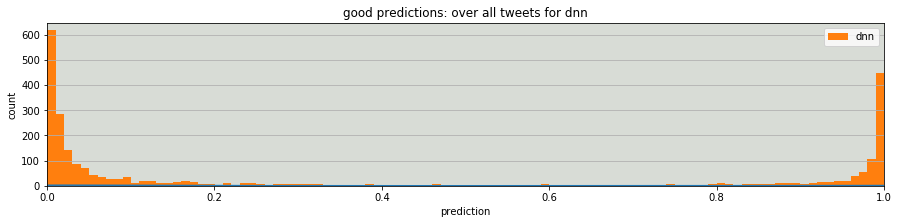

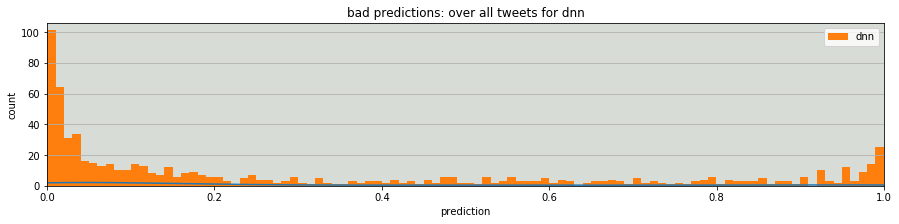

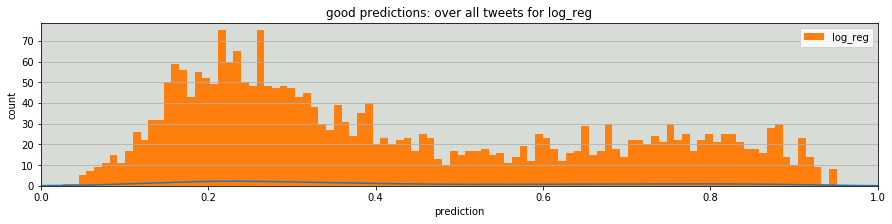

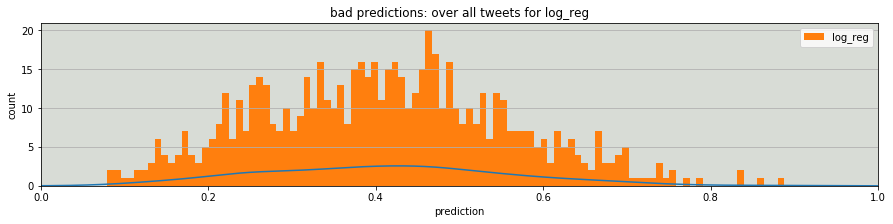

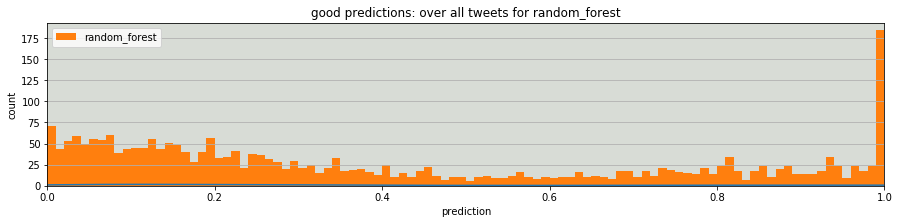

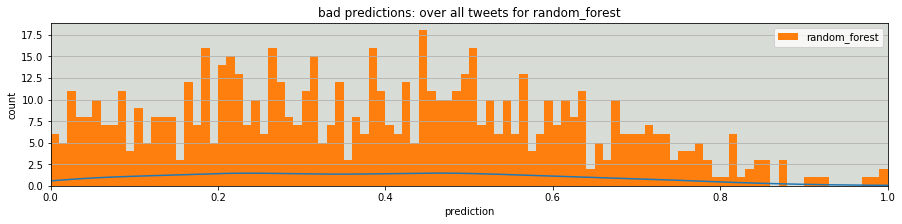

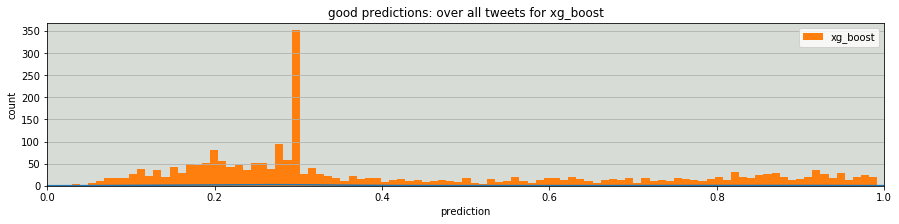

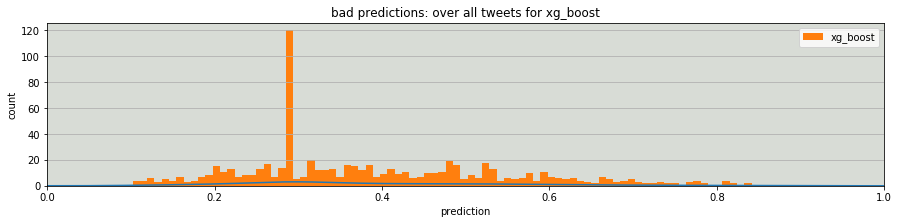

In [303]:
# plot wrong prediction values
for idx, good_pred in enumerate(good_pred_list):
    algo              = res_np_list[idx][1]
    soft_pred         = soft_pred_list[idx]                     # current algo soft (0 to 1) prediction 
    good_pred_bool    = good_pred_list[idx].astype(bool)        # current algo good prediction in boolean
    bad_pred_bool     = np.logical_not(good_pred_bool)          # current algo bad prediction in boolean

    dist              = pd.DataFrame(soft_pred[good_pred_bool],columns=[algo])
    plot_pred_dist(dist,'good predictions: over all tweets for ' + algo,'cnt' )
    dist              = pd.DataFrame(soft_pred[bad_pred_bool],columns=[algo])
    plot_pred_dist(dist,'bad predictions: over all tweets for ' + algo,'cnt' )
    
 

In [304]:
######## !!!!!!!! FIRST SET OF OBSERVATIONS !!!!!!!! ########
# 1 : No need for fancy algorithms : best performing algorithm is logistic regression
# 2 : DNN doesn't look good
#     2.1 overall performance similar to others algorithm
#     2.2 but least potential for improvement (1.5%)
#     2.3 predictions are heavily polarized very much around 0 and 1 --> DNN weight in the sum will be huge compared to others 
#     2.4 previous points could be compensated by changing its distrubution BUT a significant number of bad predictions have a large weight (i.e. close to 0 or 1) --> DNN weights can't be trusted 

In [305]:
# repeat analyze removing some algorithms
def with_less_algo(algo_idx_list):
    new_res_np_list     = list( res_np_list[i] for i in algo_idx_list )
    soft_pred_list      = list()
    good_pred_list      = list()
    # sum of all algos soft (0 to 1) prediction 
    soft_pred_all       = np.array(new_res_np_list[0][0].target.to_numpy()) *  0
    # sum of all algos optimum hard (0 or 1) prediction, or of all good predictions 
    good_pred_all_opt   = np.int64(np.array(new_res_np_list[0][0].target.to_numpy()) *  0)
    for res in new_res_np_list:
        algo              = res[1]
        print(algo)
        soft_pred         = res[0].target.to_numpy()                     # current algo soft (0 to 1) prediction 
        soft_pred_list.append(soft_pred)                                 # log soft predictions for all algos, for later use
        hard_pred         = np.where(soft_pred>0.5, 1, 0)                # current algo hard (0 to 1) prediction
        good_pred         = 1-((np.bitwise_xor(perfect_pred,hard_pred))) # compute current algo good predictions (0:bad/1:good predictions)
        good_pred_list.append(good_pred)                                 # log good predictions for all algos, for later use
        pred_perf         = np.round(100*np.mean(good_pred),decimals=1)  # current algo prediction performance 
        #print(algo, "performance of prediction =", pred_perf, "%")

        good_pred_all_opt = np.bitwise_or(good_pred,good_pred_all_opt)   # the optimum good prediction is the sum (i.e. or) of all individual algo good prediction

        soft_pred_all     = soft_pred_all + soft_pred                    # add soft predictions from all individual algo

    soft_pred_all = soft_pred_all/len(new_res_np_list)
    hard_pred_all = np.where((soft_pred_all)>0.5, 1, 0)                  # sum of all algos hard (0 to 1) prediction   
    good_pred_all = 1-((np.bitwise_xor(perfect_pred,hard_pred_all)))     # compute sum of all algos good predictions (0:bad/1:good predictions)
    pred_perf_all = np.round(100*np.mean(good_pred_all),decimals=1)      # all algos prediction performance 
    print("all algos added", "performances =", pred_perf_all, "%")      

    pred_perf_all_opt = np.round(100*np.mean(good_pred_all_opt),decimals=1)         # all algos optimal prediction performance 
    print("all algos added could optimally get to",pred_perf_all_opt,"%")
    print()


In [306]:
# try without DNN
with_less_algo([1,2,3]) #removing DNN



log_reg
random_forest
xg_boost
all algos added performances = 80.0 %
all algos added could optimally get to 86.2 %



In [307]:
# WOW, actually maybe DNN wasn't so bad after all!!! Removing it doesn't help, performances are even slightly worse
# try now, removing other algorithms
with_less_algo([0,2,3]) #removing logistic regression
with_less_algo([0,1,3]) #removing random forest
with_less_algo([0,1,2]) #removing xgboost




dnn
random_forest
xg_boost
all algos added performances = 80.0 %
all algos added could optimally get to 86.9 %

dnn
log_reg
xg_boost
all algos added performances = 79.7 %
all algos added could optimally get to 86.9 %

dnn
log_reg
random_forest
all algos added performances = 79.9 %
all algos added could optimally get to 86.3 %



In [308]:
# WOW the best is to remove logistic regression which seperately is the best one!
# now with only 2 algorithms
with_less_algo([0,1]) #with DNN + logistic regression
with_less_algo([0,2]) #with DNN + random forest
with_less_algo([0,3]) #with DNN + xgboost
with_less_algo([1,2]) #with logistic regression + random forest
with_less_algo([1,3]) #with logistic regression + xgboost
with_less_algo([2,3]) #with random forest + xgboost




dnn
log_reg
all algos added performances = 79.3 %
all algos added could optimally get to 83.4 %

dnn
random_forest
all algos added performances = 79.3 %
all algos added could optimally get to 84.5 %

dnn
xg_boost
all algos added performances = 79.3 %
all algos added could optimally get to 85.6 %

log_reg
random_forest
all algos added performances = 79.8 %
all algos added could optimally get to 84.5 %

log_reg
xg_boost
all algos added performances = 79.2 %
all algos added could optimally get to 84.4 %

random_forest
xg_boost
all algos added performances = 79.5 %
all algos added could optimally get to 83.1 %



In [309]:
######## !!!!!!!! SECOND SET OF OBSERVATIONS !!!!!!!! ########
# Removing 1 or 2 algos doesn't help, it's always better to keep them all
# Now let's try to improve by making a "smarter sum"

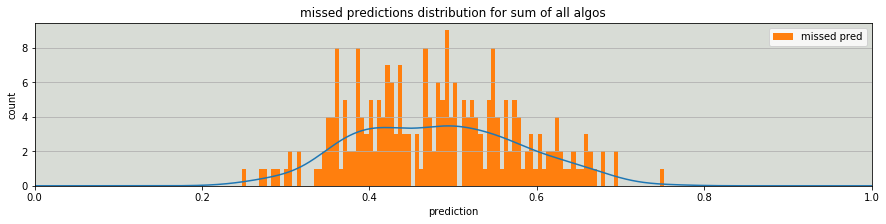

In [310]:
missed_pred_bool  = missed_pred.astype(bool)        # missed predictions in boolean
#print(soft_pred_all[missed_pred_bool])
dist              = pd.DataFrame(soft_pred_all[missed_pred_bool],columns=['missed pred'])
plot_pred_dist(dist,'missed predictions distribution for sum of all algos' ,'cnt' )


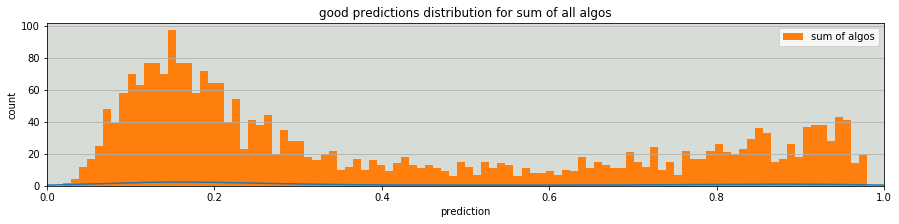

In [311]:
# plot predictions distributions
good_pred_all_bool = good_pred_all.astype(bool)        # good predictions in boolean
dist = pd.DataFrame(soft_pred_all[good_pred_all_bool],columns=['sum of algos'])

plot_pred_dist(dist,'good predictions distribution for sum of all algos' ,'cnt' )



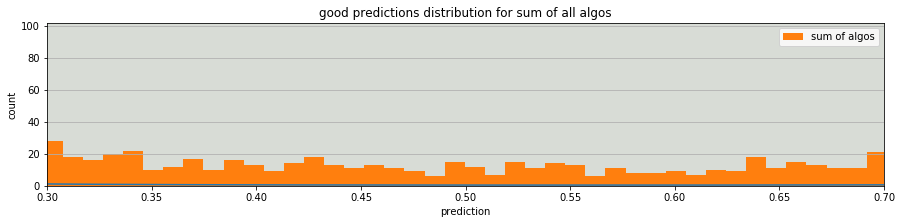

In [313]:
# zoom in central region
plot_pred_dist(dist,'good predictions distribution for sum of all algos' ,'cnt',x_min = 0.3,x_max = 0.7)

In [ ]:
# clearly issues are in the central region 0.3-0.7 or even tighter 0.4-0.6 where most of missed predictions are located
# now for those predictions we want to see how the predictions for each individual algorithm was
# maybe it's better to take a majority vote, or only the most likely one, or one or some given algorithms are bettter predictors for those samples


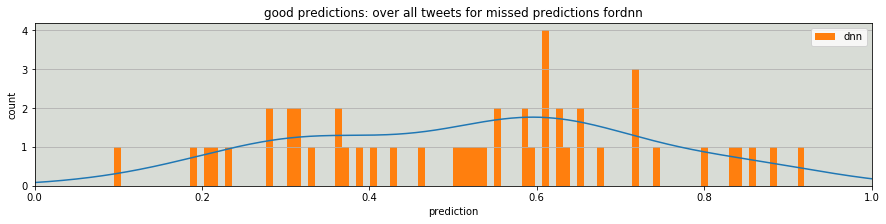

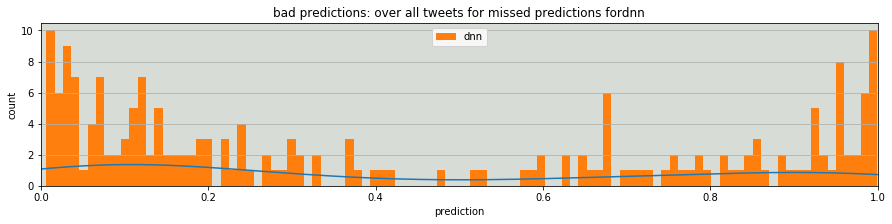

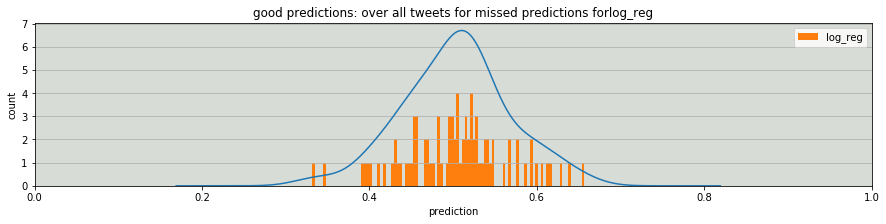

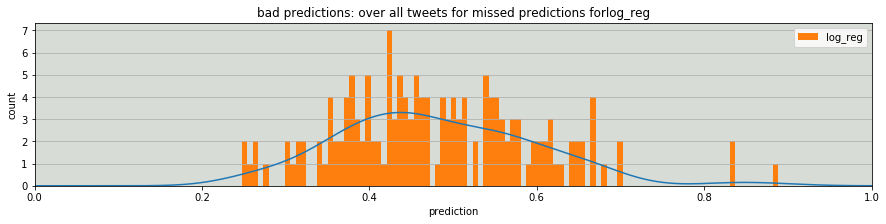

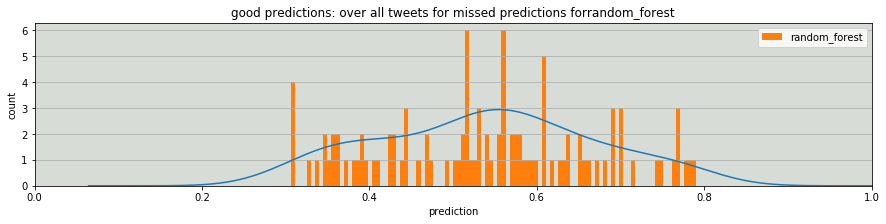

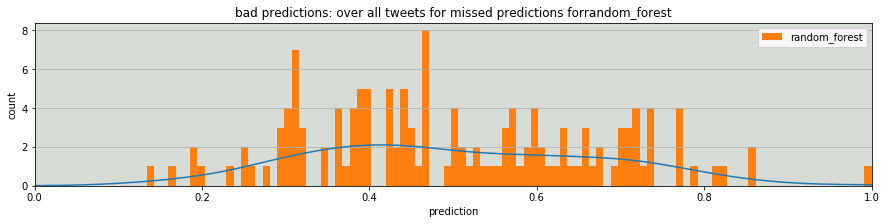

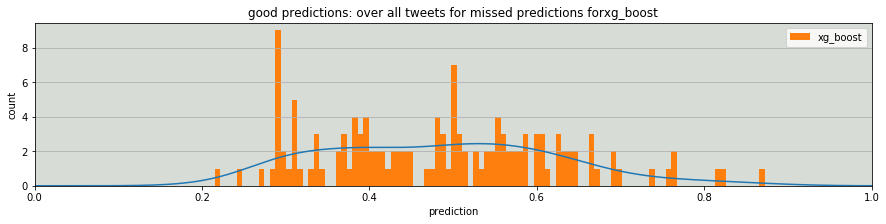

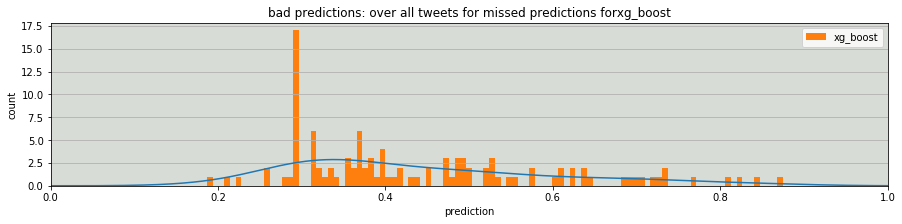

In [315]:
# first let's see, per algo, for the missed values, what were values for correct and incorrect predictions
# if correct predictions are mostly out of central range and incorrect mostly in central range, we can think of excuding predictions in central range
for idx, good_pred in enumerate(good_pred_list):
    algo                     = res_np_list[idx][1]
    soft_pred                = soft_pred_list[idx]                     # current algo soft (0 to 1) prediction 

    soft_pred_missed         = soft_pred[missed_pred_bool]
    good_pred_missed_bool    = (good_pred_list[idx].astype(bool))[missed_pred_bool]          # current algo good prediction in boolean for missed predictions
    bad_pred_missed_bool     = np.logical_not(good_pred_missed_bool)                         # current algo bad prediction in boolean for missed predictions
        
    dist                     = pd.DataFrame(soft_pred_missed[good_pred_missed_bool],columns=[algo])
    plot_pred_dist(dist,'good predictions: over all tweets for missed predictions for' + algo,'cnt' )
    
    dist                     = pd.DataFrame(soft_pred_missed[bad_pred_missed_bool],columns=[algo])
    plot_pred_dist(dist,'bad predictions: over all tweets for missed predictions for' + algo,'cnt' )